In [12]:
import sklearn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.charts import Scatter
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [51]:
data = pd.DataFrame.from_csv('../DataFiles/train_headers.csv')

In [52]:
data

,net_profit_/_total_assets_,total_liabilities_/_total_assets_,working_capital_/_total_assets_,current_assets_/_short-term_liabilities_,[(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)_/_(operating_eAttrpenses_-_depreciation)]_*_365_,retained_earnings_/_total_assets_,EBIT_/_total_assets_,book_value_of_equity_/_total_liabilities_,sales_/_total_assets_,equity_/_total_assets_,...,(current_assets_-_inventory_-_short-term_liabilities)_/_(sales_-_gross_profit_-_depreciation)_,total_costs_/total_sales_,long-term_liabilities_/_equity_,sales_/_inventory_,sales_/_receivables_,(short-term_liabilities_*365)_/_sales_,sales_/_short-term_liabilities_,sales_/_fiAttred_assets,binary_value_indicating_whether_the_company_went_bankrupt_by_year_6_of_the_forecasting_period_(1)_or_not_(0),year_of_the_forecasting_period._Takes_integer_values_btwn_1-5
0,-0.044768,0.168740,0.132450,-0.066106,0.015602,-0.019489,11536.000,0.031639,1.203000,-0.019489,...,14.23200,13.10500,63.8340,5.7180,2.47180,-0.019489,0.203000,1.68570,0,2
1,-0.159500,0.248900,-0.159500,-0.212390,-0.084035,-0.159500,-2476.200,-0.147400,1.331700,-0.159500,...,2.99760,7.27360,208.0900,1.7541,3.89030,-0.159500,0.331450,0.91477,1,3
2,0.277400,0.690190,0.338000,1.065300,0.142830,0.330020,327.500,1.114500,3.227800,0.330020,...,6.82440,5.59370,46.7790,7.8027,12.38700,0.330020,2.227800,2.41730,0,3
3,0.274110,0.665890,0.348640,1.916000,0.123270,0.340110,290.660,1.255800,2.993000,0.340110,...,37.00200,23.34600,19.0360,19.1750,5.19550,0.340110,1.993000,3.40360,0,1
4,0.075884,0.458650,0.095092,0.287640,0.141080,0.095092,1004.900,0.363230,2.552200,0.095092,...,7.04600,6.62660,119.6100,3.0515,1.50540,0.095092,1.170600,1.10160,0,1
5,-0.078272,0.263200,-0.059944,-0.114220,0.015324,-0.078272,6287.900,0.058048,1.357200,-0.078272,...,10.48000,9.64280,89.6200,4.0727,22.62000,-0.078272,0.357220,2.79100,0,2
6,-0.050375,0.068343,-0.050620,-0.054640,0.000531,-0.050620,153830.000,0.002373,1.079400,-0.050620,...,37.83300,7.20420,81.7060,4.4672,24.31600,-0.050620,0.073771,0.98269,0,1
7,0.061831,0.806270,0.067762,0.983690,0.311640,0.061831,1032.700,0.353430,5.161900,0.061831,...,0.83649,0.58817,104.4200,3.4953,1.65610,0.061831,4.161900,0.21970,0,4
8,0.001093,0.510010,0.003199,0.004688,0.004767,0.002297,3426.300,0.106530,2.040800,0.002297,...,38.95000,93.80400,16.3340,22.3460,171.36000,0.002297,1.040800,10.95000,0,3
9,0.522530,0.813660,0.647570,3.445400,0.246130,0.642040,105.350,3.464600,5.366400,0.642040,...,6.27950,7.95130,25.9300,14.0770,184.29000,0.642040,4.366400,2.62310,0,2


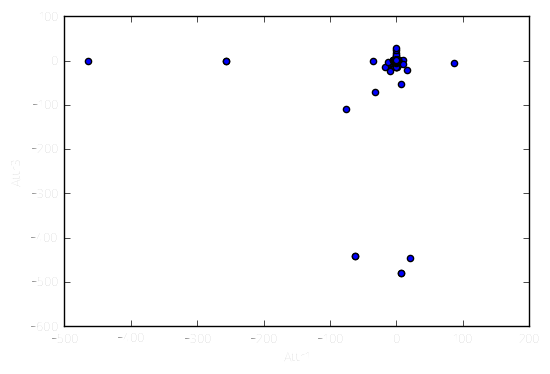

In [4]:
data.plot(x='Attr1', y='Attr3', kind='scatter', )

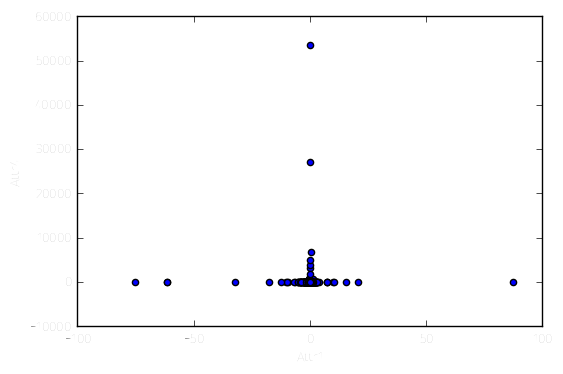

In [5]:
data.plot(x='Attr1', y='Attr4', kind='scatter', )

In [19]:
p = Scatter(data, x='Attr1', y='Attr4')

In [20]:
from bokeh.io import show
show(p)